In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import warnings
import squarify
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', delimiter='\t')

In [5]:
data.shape

(2240, 29)

In [6]:
display(data)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
duplicateCount = data.duplicated().sum()
duplicateCount

0

In [8]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [10]:
sample = data.sample(n=5, random_state=1)
sample

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
779,10736,1971,Graduation,Single,72258.0,0,1,12-09-2013,28,522,...,2,0,0,0,0,0,0,3,11,0
389,9799,1968,PhD,Divorced,83664.0,1,1,08-05-2013,57,866,...,5,0,0,0,0,0,0,3,11,0
510,9925,1981,PhD,Together,39665.0,1,0,25-05-2013,97,127,...,7,1,0,0,0,0,0,3,11,0
1553,7321,1962,Graduation,Together,76081.0,0,0,23-05-2014,85,292,...,2,0,0,0,1,0,0,3,11,0
1172,8278,1990,PhD,Married,74214.0,0,0,26-08-2012,3,863,...,5,0,0,0,0,0,0,3,11,0


In [11]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [12]:
drop = 'ID'
data.drop(columns=[drop], inplace=True)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [13]:
data['Age'] = 2025 - data['Year_Birth']

def categorize(age):
    if age < 13:
        return 'Child'
    elif 13 <= age < 18:
        return 'Teen'
    elif 18 <= age < 35:
        return 'Young Adult'
    elif 35 <= age < 65:
        return 'Adult'
    else:
        return 'Senior'

data['Age_Category'] = data['Age'].apply(categorize)

data['Age_Category'] = pd.Categorical(data['Age_Category'], 
                                       categories=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'], 
                                       ordered=True)

data[['Year_Birth', 'Age', 'Age_Category']].head()

,Year_Birth,Age,Age_Category
0,1957,68,Senior
1,1954,71,Senior
2,1965,60,Adult
3,1984,41,Adult
4,1981,44,Adult


In [14]:
drop = 'Year_Birth'
data.drop(columns=[drop], inplace=True)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,3,11,1,68,Senior
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,3,11,0,71,Senior
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,3,11,0,60,Adult
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,3,11,0,41,Adult
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,0,3,11,0,44,Adult


In [15]:
data.dtypes

Education                object
Marital_Status           object
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Age_Category           category
dtype: object

In [16]:
data['Education'] = data['Education'].astype('category')

In [17]:
data['Marital_Status'] = data['Marital_Status'].astype('category')

In [18]:
missingValues = data.isnull().sum()
missingValues

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Age_Category            0
dtype: int64

In [19]:
decimalPart = (data['Income'].dropna() - data['Income'].dropna().astype(int)).unique()
decimalPart

array([0.])

In [20]:
mean = data['Income'].mean()
data['Income'] = data['Income'].fillna(mean)

In [21]:
missingValues = data.isnull().sum()
missingValues

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Age_Category           0
dtype: int64

In [22]:
data['Income'] = data['Income'].astype(int)

In [23]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category
0,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,3,11,1,68,Senior
1,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,3,11,0,71,Senior
2,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,3,11,0,60,Adult
3,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,3,11,0,41,Adult
4,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,0,3,11,0,44,Adult


In [24]:
data.dtypes

Education              category
Marital_Status         category
Income                    int64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Age_Category           category
dtype: object

In [25]:
data['Kidhome'].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [26]:
data['Kidhome'] = data['Kidhome'].astype('category')

In [27]:
data['Teenhome'].value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

In [28]:
data['Teenhome'] = data['Teenhome'].astype('category')

In [29]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [30]:
data['Year'] = data['Dt_Customer'].dt.year
data['Year'].value_counts()

Year
2013    1189
2014     557
2012     494
Name: count, dtype: int64

In [31]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category,Year
0,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,3,11,1,68,Senior,2012
1,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,3,11,0,71,Senior,2014
2,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,3,11,0,60,Adult,2013
3,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,...,0,0,0,0,3,11,0,41,Adult,2014
4,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,3,11,0,44,Adult,2014


In [32]:
drop = ['Dt_Customer','Year']
data.drop(columns=drop, inplace=True)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category
0,Graduation,Single,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,68,Senior
1,Graduation,Single,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,71,Senior
2,Graduation,Together,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,60,Adult
3,Graduation,Together,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,41,Adult
4,PhD,Married,58293,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,44,Adult


In [33]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Age_Category'],
      dtype='object')

In [34]:
data.dtypes

Education              category
Marital_Status         category
Income                    int64
Kidhome                category
Teenhome               category
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Age_Category           category
dtype: object

In [35]:
minRecency = data['Recency'].min()
maxRecency = data['Recency'].max()
meanRecency = data['Recency'].mean()
print("Minimum Recency:", minRecency)
print("Maximum Recency:", maxRecency)
print("Mean Recency:", meanRecency)

Minimum Recency: 0
Maximum Recency: 99
Mean Recency: 49.109375


In [36]:
bins = [0, 7, 30, float('inf')] 
labels = ['< Weak', '< Month', '>']
data['Recency'] = pd.cut(data['Recency'], bins=bins, labels=labels, right=False)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category
0,Graduation,Single,58138,0,0,>,635,88,546,172,...,0,0,0,0,0,3,11,1,68,Senior
1,Graduation,Single,46344,1,1,>,11,1,6,2,...,0,0,0,0,0,3,11,0,71,Senior
2,Graduation,Together,71613,0,0,< Month,426,49,127,111,...,0,0,0,0,0,3,11,0,60,Adult
3,Graduation,Together,26646,1,0,< Month,11,4,20,10,...,0,0,0,0,0,3,11,0,41,Adult
4,PhD,Married,58293,1,0,>,173,43,118,46,...,0,0,0,0,0,3,11,0,44,Adult


In [37]:
data['Recency'].value_counts()

Recency
>          1548
< Month     520
< Weak      172
Name: count, dtype: int64

In [38]:
drop = 'Recency'
data.drop(columns=drop, inplace=True)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category
0,Graduation,Single,58138,0,0,635,88,546,172,88,...,0,0,0,0,0,3,11,1,68,Senior
1,Graduation,Single,46344,1,1,11,1,6,2,1,...,0,0,0,0,0,3,11,0,71,Senior
2,Graduation,Together,71613,0,0,426,49,127,111,21,...,0,0,0,0,0,3,11,0,60,Adult
3,Graduation,Together,26646,1,0,11,4,20,10,3,...,0,0,0,0,0,3,11,0,41,Adult
4,PhD,Married,58293,1,0,173,43,118,46,27,...,0,0,0,0,0,3,11,0,44,Adult


In [39]:
drop = 'Age'
data.drop(columns=drop, inplace=True)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_Category
0,Graduation,Single,58138,0,0,635,88,546,172,88,...,0,0,0,0,0,0,3,11,1,Senior
1,Graduation,Single,46344,1,1,11,1,6,2,1,...,0,0,0,0,0,0,3,11,0,Senior
2,Graduation,Together,71613,0,0,426,49,127,111,21,...,0,0,0,0,0,0,3,11,0,Adult
3,Graduation,Together,26646,1,0,11,4,20,10,3,...,0,0,0,0,0,0,3,11,0,Adult
4,PhD,Married,58293,1,0,173,43,118,46,27,...,0,0,0,0,0,0,3,11,0,Adult


In [40]:
data['AcceptedCmp3'].value_counts()

AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

In [41]:
data['AcceptedCmp1'] = data['AcceptedCmp1'].astype(bool)
data['AcceptedCmp2'] = data['AcceptedCmp2'].astype(bool)
data['AcceptedCmp3'] = data['AcceptedCmp3'].astype(bool)
data['AcceptedCmp4'] = data['AcceptedCmp4'].astype(bool)
data['AcceptedCmp5'] = data['AcceptedCmp5'].astype(bool)

In [42]:
data['Complain'].value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

In [43]:
Complain = data[data['Complain'] == 1]
Complain

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_Category
78,2n Cycle,Together,26326,0,0,1,0,5,0,3,...,False,False,False,False,False,1,3,11,0,Adult
147,Graduation,Together,38547,1,0,6,1,10,0,1,...,False,False,False,False,False,1,3,11,0,Adult
192,2n Cycle,Divorced,36640,1,0,15,6,8,7,4,...,False,False,False,False,False,1,3,11,0,Senior
271,Master,Single,31788,1,0,16,7,23,0,8,...,False,False,False,False,False,1,3,11,0,Adult
355,Graduation,Single,38643,1,1,22,2,14,0,1,...,False,False,False,False,False,1,3,11,0,Adult
358,Master,Married,65073,0,0,629,17,177,69,0,...,False,False,False,False,False,1,3,11,0,Senior
590,PhD,Single,39684,1,0,19,0,35,6,4,...,False,False,False,False,False,1,3,11,1,Adult
972,2n Cycle,Married,15716,1,0,16,5,30,8,7,...,False,False,False,False,False,1,3,11,0,Adult
1041,Graduation,Married,38998,1,1,34,1,14,0,0,...,False,False,False,False,False,1,3,11,0,Senior
1069,Graduation,Married,67023,0,0,444,44,382,11,8,...,False,False,False,False,False,1,3,11,0,Adult


In [44]:
drop = 'Complain'
data.drop(columns=drop, inplace=True)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,Age_Category
0,Graduation,Single,58138,0,0,635,88,546,172,88,...,7,False,False,False,False,False,3,11,1,Senior
1,Graduation,Single,46344,1,1,11,1,6,2,1,...,5,False,False,False,False,False,3,11,0,Senior
2,Graduation,Together,71613,0,0,426,49,127,111,21,...,4,False,False,False,False,False,3,11,0,Adult
3,Graduation,Together,26646,1,0,11,4,20,10,3,...,6,False,False,False,False,False,3,11,0,Adult
4,PhD,Married,58293,1,0,173,43,118,46,27,...,5,False,False,False,False,False,3,11,0,Adult


In [45]:
data['Loss'] = data['Z_CostContact'] > data['Z_Revenue']
Loss = data[data['Loss']]
Loss

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,Age_Category,Loss


In [46]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,Age_Category,Loss
0,Graduation,Single,58138,0,0,635,88,546,172,88,...,False,False,False,False,False,3,11,1,Senior,False
1,Graduation,Single,46344,1,1,11,1,6,2,1,...,False,False,False,False,False,3,11,0,Senior,False
2,Graduation,Together,71613,0,0,426,49,127,111,21,...,False,False,False,False,False,3,11,0,Adult,False
3,Graduation,Together,26646,1,0,11,4,20,10,3,...,False,False,False,False,False,3,11,0,Adult,False
4,PhD,Married,58293,1,0,173,43,118,46,27,...,False,False,False,False,False,3,11,0,Adult,False


In [47]:
drop = 'Loss'
data.drop(columns=drop, inplace=True)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Response,Age_Category
0,Graduation,Single,58138,0,0,635,88,546,172,88,...,7,False,False,False,False,False,3,11,1,Senior
1,Graduation,Single,46344,1,1,11,1,6,2,1,...,5,False,False,False,False,False,3,11,0,Senior
2,Graduation,Together,71613,0,0,426,49,127,111,21,...,4,False,False,False,False,False,3,11,0,Adult
3,Graduation,Together,26646,1,0,11,4,20,10,3,...,6,False,False,False,False,False,3,11,0,Adult
4,PhD,Married,58293,1,0,173,43,118,46,27,...,5,False,False,False,False,False,3,11,0,Adult


In [48]:
data['Z_Revenue'].value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

In [49]:
data['Z_CostContact'].value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [50]:
drop = ['Z_CostContact','Z_Revenue']
data.drop(columns=drop, inplace=True)
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Category
0,Graduation,Single,58138,0,0,635,88,546,172,88,...,10,4,7,False,False,False,False,False,1,Senior
1,Graduation,Single,46344,1,1,11,1,6,2,1,...,1,2,5,False,False,False,False,False,0,Senior
2,Graduation,Together,71613,0,0,426,49,127,111,21,...,2,10,4,False,False,False,False,False,0,Adult
3,Graduation,Together,26646,1,0,11,4,20,10,3,...,0,4,6,False,False,False,False,False,0,Adult
4,PhD,Married,58293,1,0,173,43,118,46,27,...,3,6,5,False,False,False,False,False,0,Adult


In [51]:
data['Response'] = data['Response'].astype(bool)

In [52]:
data.dtypes

Education              category
Marital_Status         category
Income                    int64
Kidhome                category
Teenhome               category
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3               bool
AcceptedCmp4               bool
AcceptedCmp5               bool
AcceptedCmp1               bool
AcceptedCmp2               bool
Response                   bool
Age_Category           category
dtype: object

In [53]:
for column, dtype in data.dtypes.items():
    if pd.api.types.is_numeric_dtype(dtype):
        print(f"{column}: Numerical")
    elif pd.api.types.is_categorical_dtype(dtype):
        print(f"{column}: Categorical")
    elif pd.api.types.is_bool_dtype(dtype):
        print(f"{column}: Boolean")
    else:
        print(f"{column}: Other")

Education: Categorical
Marital_Status: Categorical
Income: Numerical
Kidhome: Categorical
Teenhome: Categorical
MntWines: Numerical
MntFruits: Numerical
MntMeatProducts: Numerical
MntFishProducts: Numerical
MntSweetProducts: Numerical
MntGoldProds: Numerical
NumDealsPurchases: Numerical
NumWebPurchases: Numerical
NumCatalogPurchases: Numerical
NumStorePurchases: Numerical
NumWebVisitsMonth: Numerical
AcceptedCmp3: Numerical
AcceptedCmp4: Numerical
AcceptedCmp5: Numerical
AcceptedCmp1: Numerical
AcceptedCmp2: Numerical
Response: Numerical
Age_Category: Categorical


In [54]:
print("Numerical Columns:")
print(data.select_dtypes(include='number').columns.tolist())

Numerical Columns:
['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


In [55]:
data['Income'].describe()

count      2240.000000
mean      52247.248661
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [57]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

outliers = data[(data['Income'] < lowerBound) | (data['Income'] > upperBound)]
print("Number of outliers detected:", outliers.shape[0])

Number of outliers detected: 8


In [58]:
outliers

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Category
164,PhD,Married,157243,0,1,20,2,1582,1,2,...,22,0,0,False,False,False,False,False,False,Adult
617,PhD,Together,162397,1,1,85,1,16,2,1,...,0,1,1,False,False,False,False,False,False,Adult
655,Graduation,Divorced,153924,0,0,1,1,1,1,1,...,0,0,0,False,False,False,False,False,False,Adult
687,PhD,Married,160803,0,0,55,16,1622,17,3,...,28,1,0,False,False,False,False,False,False,Adult
1300,Master,Together,157733,1,0,39,1,9,2,0,...,0,1,1,False,False,False,False,False,False,Adult
1653,Graduation,Together,157146,0,0,1,0,1725,2,1,...,28,0,1,False,False,False,False,False,False,Adult
2132,PhD,Married,156924,0,0,2,1,2,1,1,...,0,0,0,False,False,False,False,False,False,Senior
2233,Graduation,Together,666666,1,0,9,14,18,8,1,...,1,3,6,False,False,False,False,False,False,Adult


In [59]:
data = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

In [60]:
outliers

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Category
164,PhD,Married,157243,0,1,20,2,1582,1,2,...,22,0,0,False,False,False,False,False,False,Adult
617,PhD,Together,162397,1,1,85,1,16,2,1,...,0,1,1,False,False,False,False,False,False,Adult
655,Graduation,Divorced,153924,0,0,1,1,1,1,1,...,0,0,0,False,False,False,False,False,False,Adult
687,PhD,Married,160803,0,0,55,16,1622,17,3,...,28,1,0,False,False,False,False,False,False,Adult
1300,Master,Together,157733,1,0,39,1,9,2,0,...,0,1,1,False,False,False,False,False,False,Adult
1653,Graduation,Together,157146,0,0,1,0,1725,2,1,...,28,0,1,False,False,False,False,False,False,Adult
2132,PhD,Married,156924,0,0,2,1,2,1,1,...,0,0,0,False,False,False,False,False,False,Senior
2233,Graduation,Together,666666,1,0,9,14,18,8,1,...,1,3,6,False,False,False,False,False,False,Adult


In [61]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Category
0,Graduation,Single,58138,0,0,635,88,546,172,88,...,10,4,7,False,False,False,False,False,True,Senior
1,Graduation,Single,46344,1,1,11,1,6,2,1,...,1,2,5,False,False,False,False,False,False,Senior
2,Graduation,Together,71613,0,0,426,49,127,111,21,...,2,10,4,False,False,False,False,False,False,Adult
3,Graduation,Together,26646,1,0,11,4,20,10,3,...,0,4,6,False,False,False,False,False,False,Adult
4,PhD,Married,58293,1,0,173,43,118,46,27,...,3,6,5,False,False,False,False,False,False,Adult


In [62]:
data['Income'] = data['Income'].astype(int)

In [63]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Category
0,Graduation,Single,58138,0,0,635,88,546,172,88,...,10,4,7,False,False,False,False,False,True,Senior
1,Graduation,Single,46344,1,1,11,1,6,2,1,...,1,2,5,False,False,False,False,False,False,Senior
2,Graduation,Together,71613,0,0,426,49,127,111,21,...,2,10,4,False,False,False,False,False,False,Adult
3,Graduation,Together,26646,1,0,11,4,20,10,3,...,0,4,6,False,False,False,False,False,False,Adult
4,PhD,Married,58293,1,0,173,43,118,46,27,...,3,6,5,False,False,False,False,False,False,Adult


### Extra Test 1

In [64]:
shapiro = stats.shapiro(data['Income'])
print('Shapiro-Wilk Test Statistic:', shapiro.statistic)
print('Shapiro-Wilk Test p-value:', shapiro.pvalue)

alpha = 0.05
if shapiro.pvalue > alpha:
    print("The null hypothesis (data is normally distributed) cannot be rejected.")
else:
    print("The null hypothesis (data is normally distributed) is rejected.")

Shapiro-Wilk Test Statistic: 0.9856275829872816
Shapiro-Wilk Test p-value: 3.255019536606563e-14
The null hypothesis (data is normally distributed) is rejected.


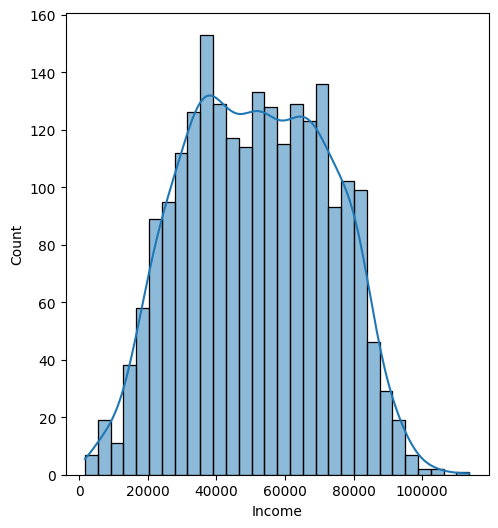

In [65]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Income'], kde=True, bins=30)
plt.show()

In [66]:
data['MntWines'].describe()

count    2232.000000
mean      304.930108
std       336.784950
min         0.000000
25%        24.000000
50%       176.000000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64

In [67]:
spending = [
 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

data[spending].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,304.930108,26.380376,165.319444,37.644713,27.155466,44.166219
std,336.784950,39.821532,219.401447,54.689504,41.325414,52.204505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,176.000000,8.000000,67.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,231.250000,50.000000,34.000000,56.250000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


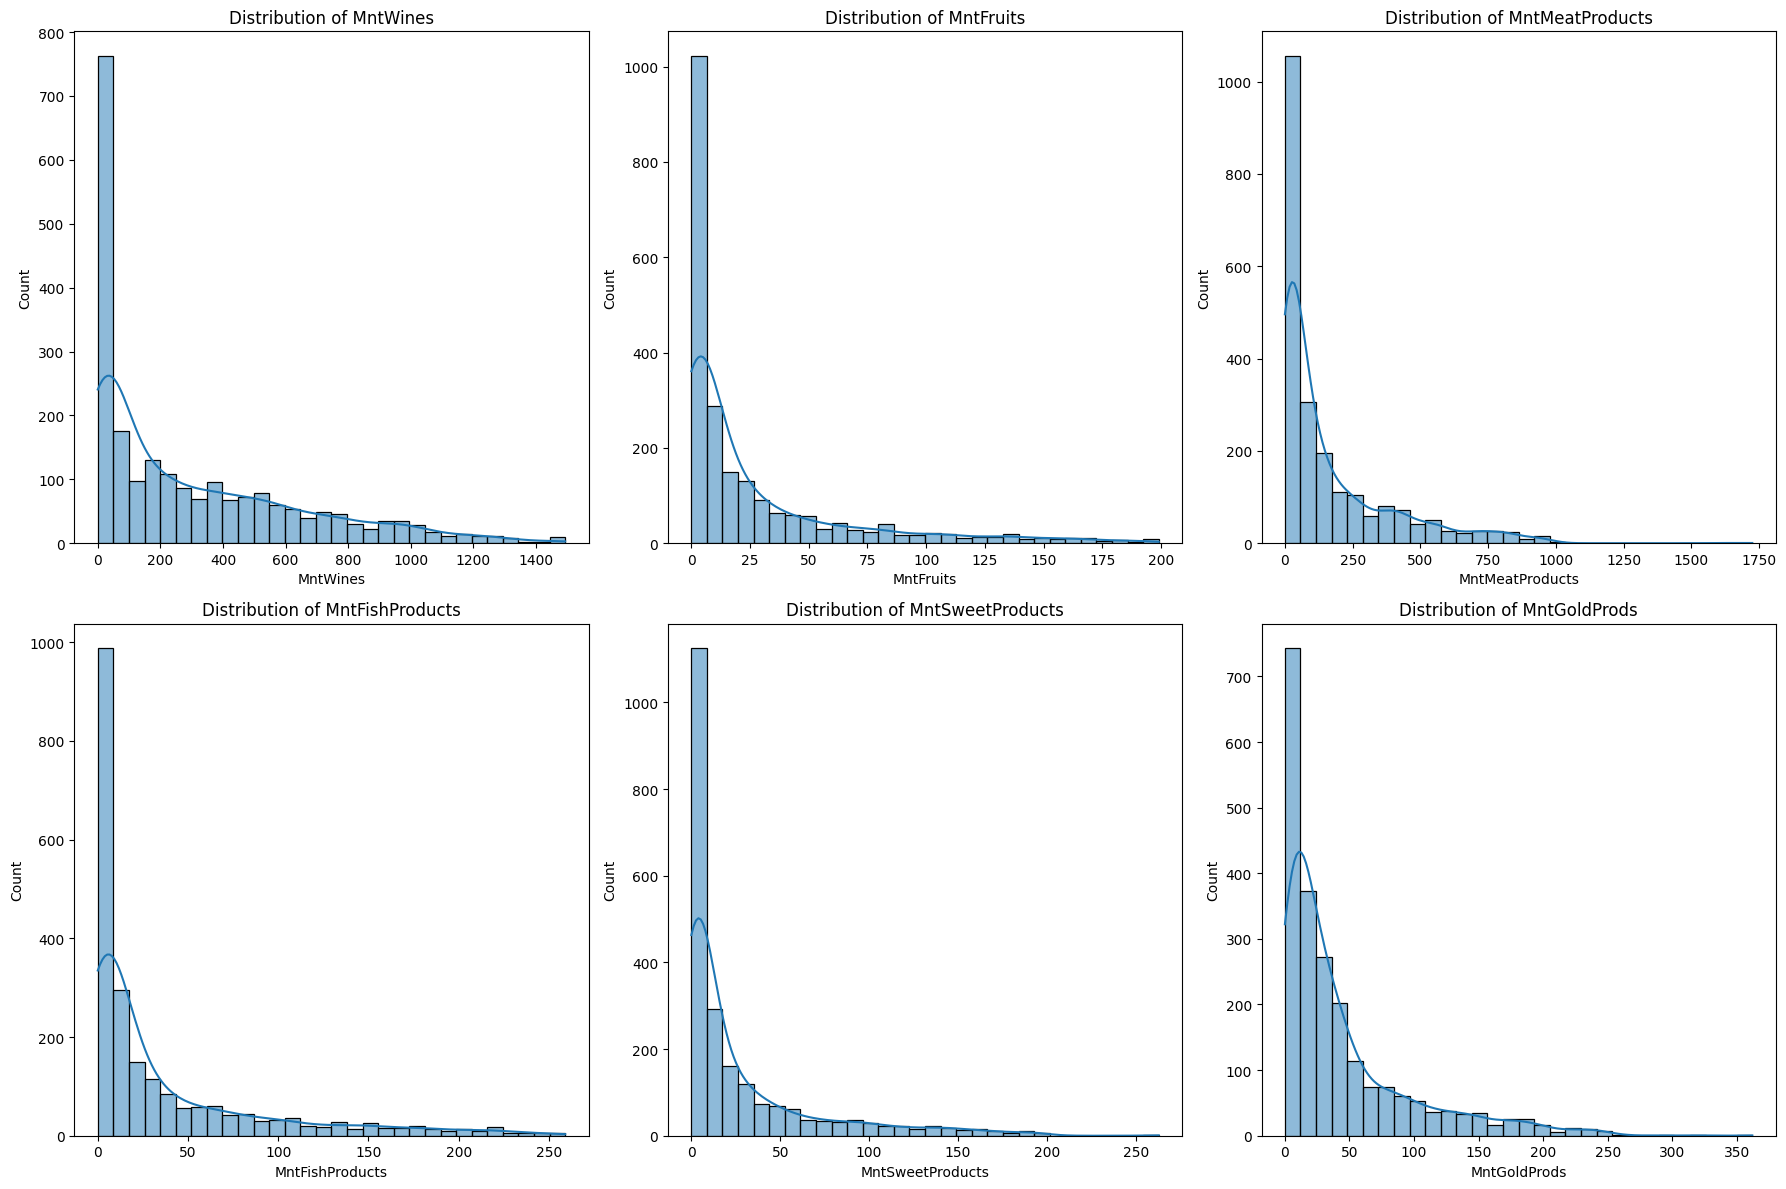

In [68]:
num = len(spending)
num_rows = (num + 2) // 3

plt.figure(figsize=(18, 12))

for i, column in enumerate(spending):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [69]:
spending = [
'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
]

data[spending].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2232.000000,2232.000000,2232.000000,2232.000000
mean,2.318100,4.097670,2.636201,5.808244
std,1.894595,2.774726,2.795959,3.242198
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


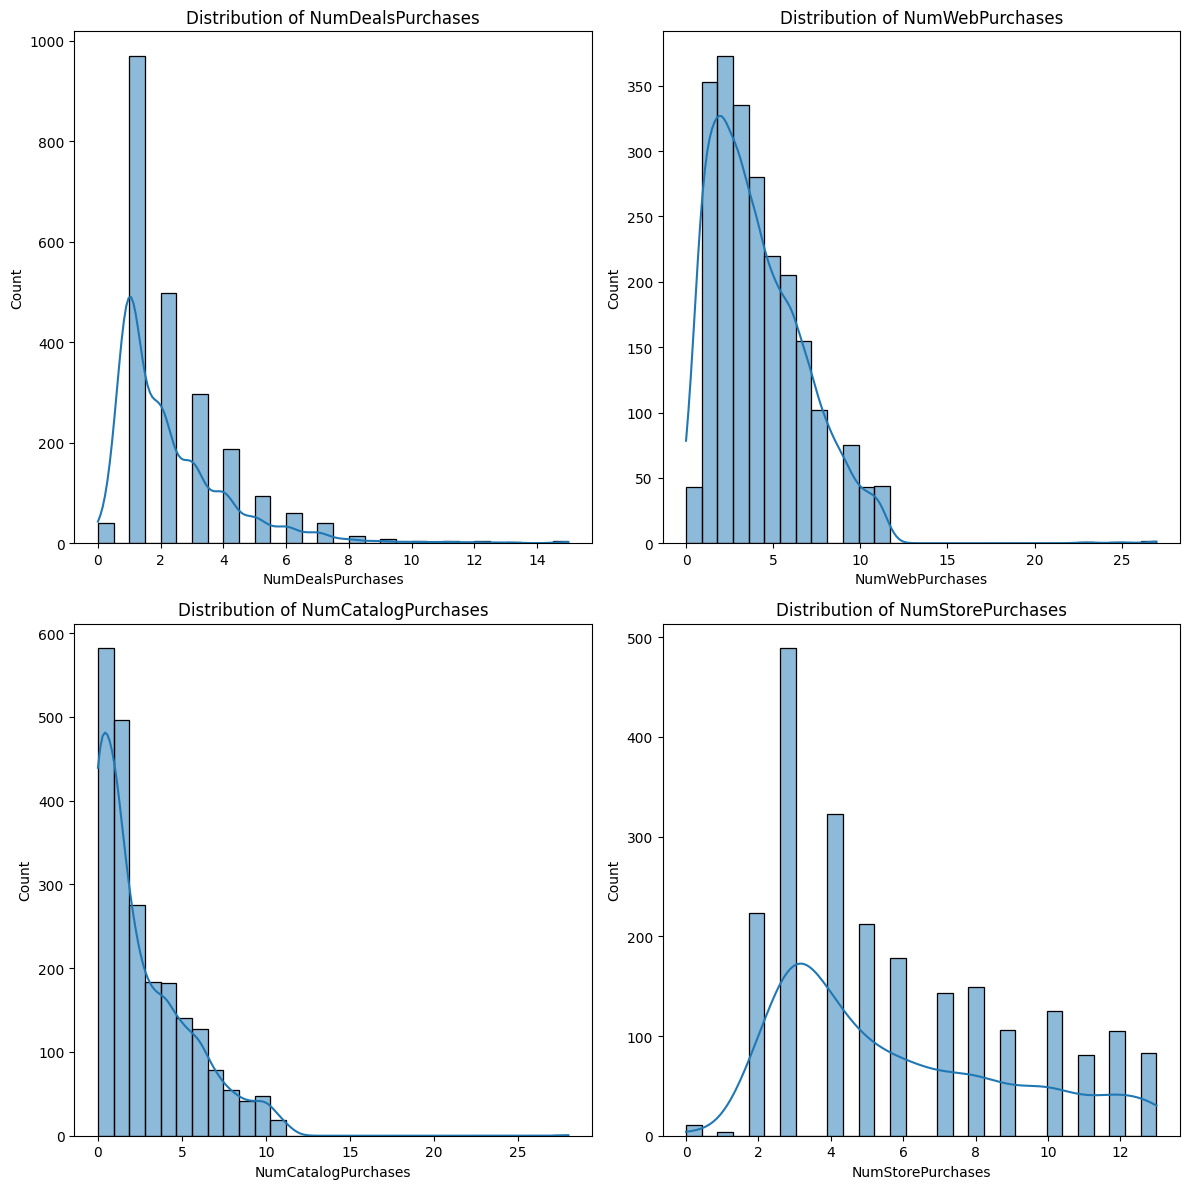

In [70]:
num = len(spending)
num_rows = (num + 1) // 2  
plt.figure(figsize=(12, num_rows * 6))  

for i, column in enumerate(spending):
    plt.subplot(num_rows, 2, i + 1) 
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')  

plt.tight_layout()  
plt.show()

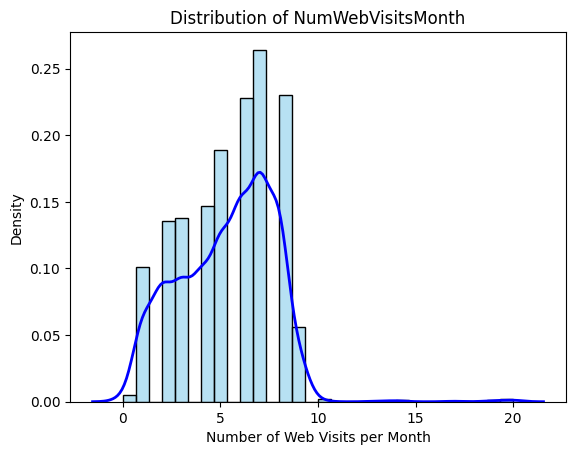

In [69]:

sns.histplot(data['NumWebVisitsMonth'], bins=30, color='skyblue', alpha=0.6, stat='density')

# Add KDE line in a different color
sns.kdeplot(data['NumWebVisitsMonth'], color='blue', linewidth=2)

# Add titles and labels
plt.title('Distribution of NumWebVisitsMonth')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Density')

# Show the plot
plt.show()

In [71]:
print("Categorical Columns:")
print(data.select_dtypes(include='category').columns.tolist())

Categorical Columns:
['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Age_Category']


In [72]:
data['Education'].value_counts()

Education
Graduation    1124
PhD            482
Master         369
2n Cycle       203
Basic           54
Name: count, dtype: int64

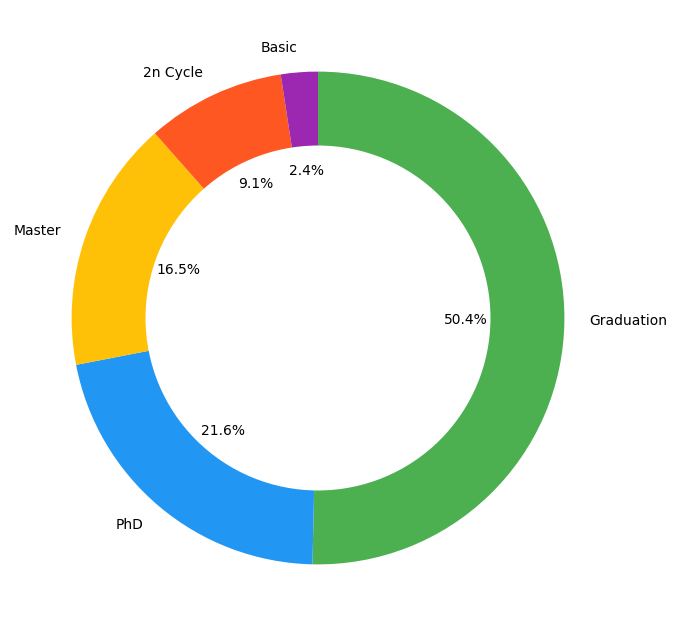

In [73]:
labels = data['Education'].value_counts().index
sizes = data['Education'].value_counts().values
colors = ['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, counterclock=False, autopct='%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [74]:
data['Marital_Status'].value_counts()

Marital_Status
Married     861
Together    576
Single      480
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

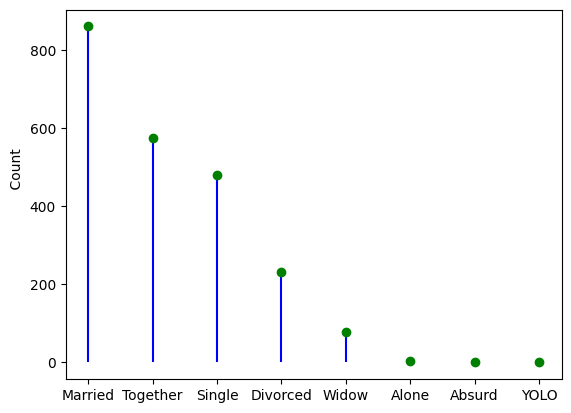

In [75]:
labels = data['Marital_Status'].value_counts().index
counts = data['Marital_Status'].value_counts().values

plt.stem(labels, counts, markerfmt='go', basefmt=" ", linefmt='b-', use_line_collection=True)

plt.ylabel('            Count')
plt.show()

In [76]:
data['Kidhome'].value_counts()

Kidhome
0    1288
1     896
2      48
Name: count, dtype: int64

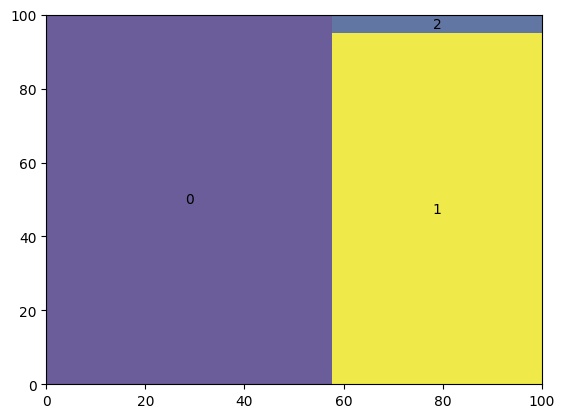

In [84]:
labels = data['Kidhome'].value_counts().index
sizes = data['Kidhome'].value_counts().values

squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.show()

In [85]:
data['Teenhome'].value_counts()

Teenhome
0    1152
1    1028
2      52
Name: count, dtype: int64

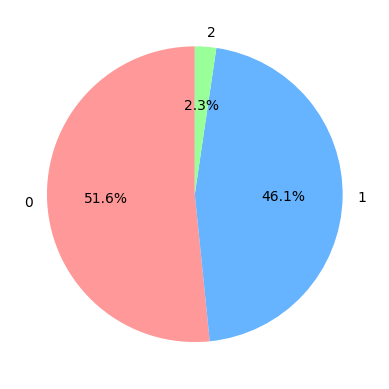

In [86]:
labels = data['Teenhome'].value_counts().index.astype(str)
sizes = data['Teenhome'].value_counts().values
colors = ['#FF9999', '#66B3FF', '#99FF99'] 

plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.show()

In [87]:
data['Age_Category'].value_counts()

Age_Category
Adult          1571
Senior          618
Young Adult      43
Child             0
Teen              0
Name: count, dtype: int64

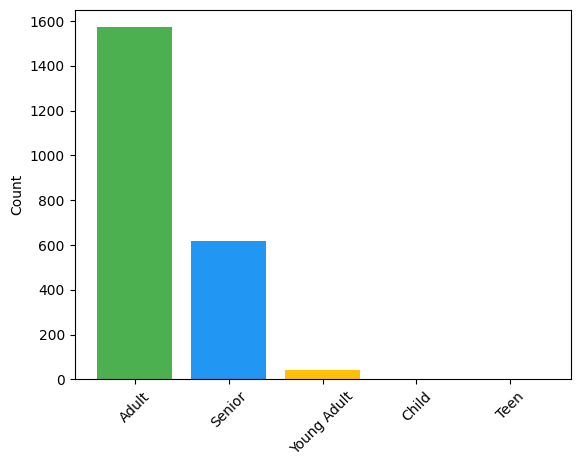

In [88]:
labels = data['Age_Category'].value_counts().index
counts = data['Age_Category'].value_counts().values

plt.bar(labels, counts, color=['#4CAF50', '#2196F3', '#FFC107'])

plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [89]:
print("Boolean Columns:")
print(data.select_dtypes(include='bool').columns.tolist())

Boolean Columns:
['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']


In [90]:
print(data['AcceptedCmp1'].value_counts())
print('----------------------------')
print(data['AcceptedCmp2'].value_counts())
print('----------------------------')
print(data['AcceptedCmp3'].value_counts())
print('----------------------------')
print(data['AcceptedCmp4'].value_counts())
print('----------------------------')
print(data['AcceptedCmp5'].value_counts())

AcceptedCmp1
False    2088
True      144
Name: count, dtype: int64
----------------------------
AcceptedCmp2
False    2202
True       30
Name: count, dtype: int64
----------------------------
AcceptedCmp3
False    2069
True      163
Name: count, dtype: int64
----------------------------
AcceptedCmp4
False    2065
True      167
Name: count, dtype: int64
----------------------------
AcceptedCmp5
False    2069
True      163
Name: count, dtype: int64


In [91]:
acceptanceRates = {}

for column in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    true = data[column].sum()
    false = len(data[column]) - true
    total = true + false
    acceptanceRate = true / total
    acceptanceRates[column] = acceptanceRate

for campaign, rate in acceptanceRates.items():
    print(f"{campaign}: {rate:.4f}")

AcceptedCmp1: 0.0645
AcceptedCmp2: 0.0134
AcceptedCmp3: 0.0730
AcceptedCmp4: 0.0748
AcceptedCmp5: 0.0730


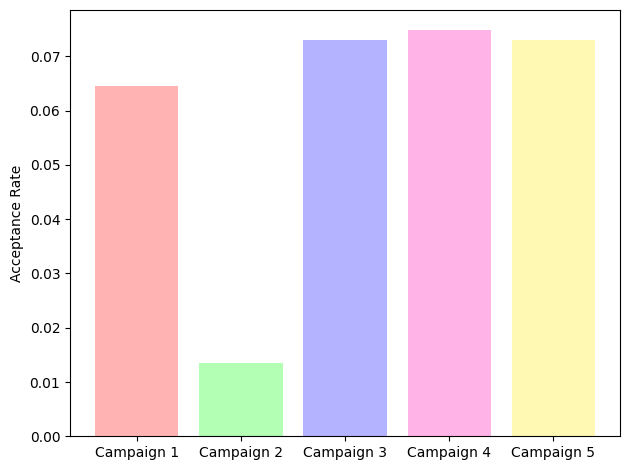

In [92]:
d = pd.DataFrame(list(acceptanceRates.items()), columns=['Campaign', 'Acceptance Rate'])

colors = ['#FFB3B3', '#B3FFB3', '#B3B3FF', '#FFB3E6', '#FFF9B3']

d['Campaign'] = ['Campaign ' + str(i + 1) for i in range(len(d))]
plt.bar(d['Campaign'], d['Acceptance Rate'], color=colors)

plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

In [93]:
data['Response'].value_counts()

Response
False    1898
True      334
Name: count, dtype: int64

In [94]:
falseR = data['Response'].value_counts().get(False, 0)
trueR = data['Response'].value_counts().get(True, 0)

totalR = falseR + trueR
responseRate = (trueR / totalR) * 100 if totalR > 0 else 0
print(f'Response Rate: {responseRate:.2f} %')

Response Rate: 14.96 %


In [95]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Category
0,Graduation,Single,58138,0,0,635,88,546,172,88,...,10,4,7,False,False,False,False,False,True,Senior
1,Graduation,Single,46344,1,1,11,1,6,2,1,...,1,2,5,False,False,False,False,False,False,Senior
2,Graduation,Together,71613,0,0,426,49,127,111,21,...,2,10,4,False,False,False,False,False,False,Adult
3,Graduation,Together,26646,1,0,11,4,20,10,3,...,0,4,6,False,False,False,False,False,False,Adult
4,PhD,Married,58293,1,0,173,43,118,46,27,...,3,6,5,False,False,False,False,False,False,Adult


In [96]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age_Category'],
      dtype='object')

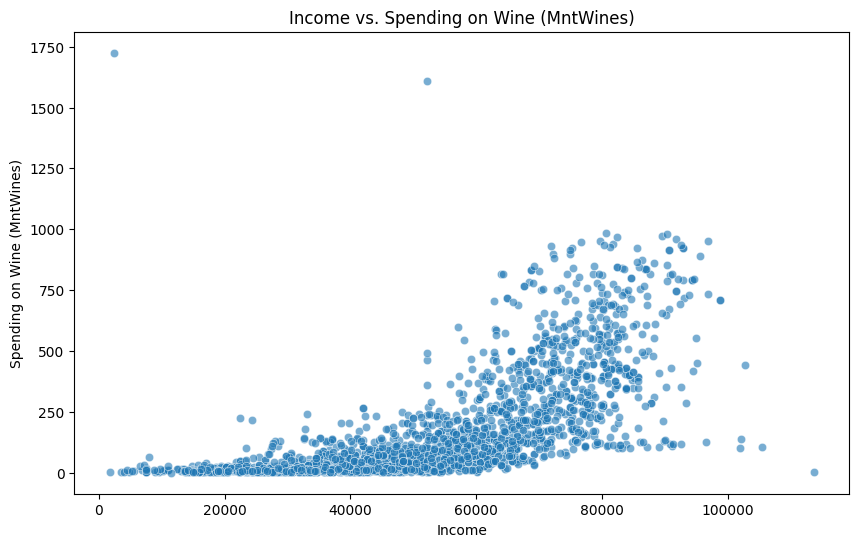

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income', y='MntMeatProducts', alpha=0.6)
plt.title('Income vs. Spending on Wine (MntWines)')
plt.xlabel('Income')
plt.ylabel('Spending on Wine (MntWines)')
plt.show()

In [98]:
labelEncoder = LabelEncoder()
mappings = {}
categorical = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Age_Category']

for column in categorical:
    data[column] = labelEncoder.fit_transform(data[column])
    mappings[column] = labelEncoder.classes_

In [99]:
for column, classes in mappings.items():
    print(f"\nMapping for {column}:")
    for idx, category in enumerate(classes):
        print(f"{idx}: {category}")


Mapping for Education:
0: 2n Cycle
1: Basic
2: Graduation
3: Master
4: PhD

Mapping for Marital_Status:
0: Absurd
1: Alone
2: Divorced
3: Married
4: Single
5: Together
6: Widow
7: YOLO

Mapping for Kidhome:
0: 0
1: 1
2: 2

Mapping for Teenhome:
0: 0
1: 1
2: 2

Mapping for Age_Category:
0: Adult
1: Senior
2: Young Adult


In [100]:
bools = data.select_dtypes(include='bool').columns
data[bools] = data[bools].astype(int)

In [101]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age_Category
0,2,4,58138,0,0,635,88,546,172,88,...,10,4,7,0,0,0,0,0,1,1
1,2,4,46344,1,1,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,1
2,2,5,71613,0,0,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,2,5,26646,1,0,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,4,3,58293,1,0,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0


In [102]:
data['Income'] = data['Income'].astype(int)

In [103]:
data.dtypes

Education              int64
Marital_Status         int64
Income                 int64
Kidhome                int64
Teenhome               int64
MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
AcceptedCmp3           int64
AcceptedCmp4           int64
AcceptedCmp5           int64
AcceptedCmp1           int64
AcceptedCmp2           int64
Response               int64
Age_Category           int64
dtype: object

 ### 1. Do customers from different education levels have different income levels?

In [104]:
groups = data.groupby('Education')['Income'].apply(list)

statistic, p_value = kruskal(*groups)

print(f"Kruskal-Wallis H test statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between the income levels of different education backgrounds.")
else:
    print("Fail to reject the null hypothesis: No significant differences between income levels.")

Kruskal-Wallis H test statistic: 140.85229337759753
P-value: 1.8542587313646824e-29
Reject the null hypothesis: There are significant differences between the income levels of different education backgrounds.


**Mapping for Education:**
* 0: 2n Cycle
* 1: Basic
* 2: Graduation
* 3: Master
* 4: PhD

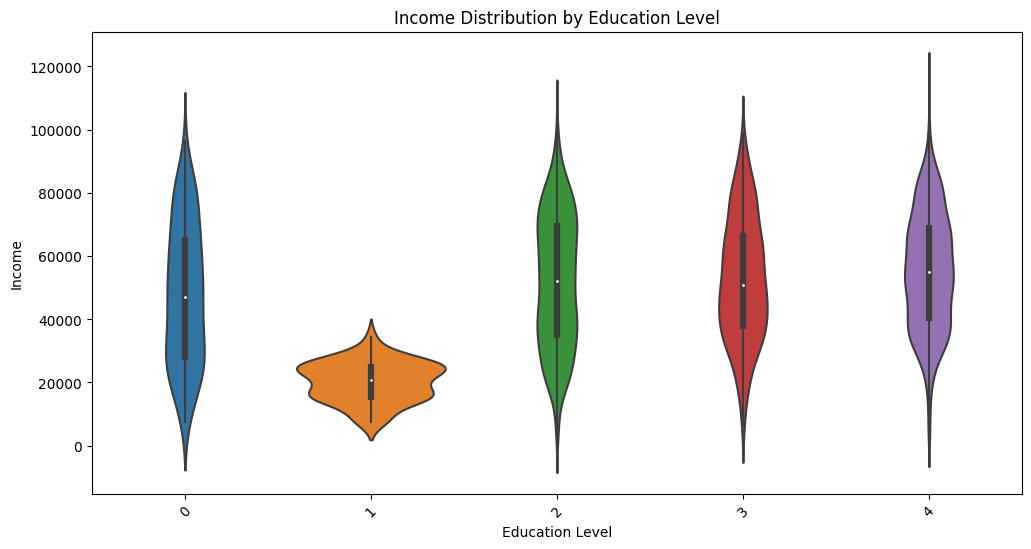

In [105]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Education', y='Income', data=data)

plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

### 2. Does the marketing campaign influence spending behavior across customer groups?

In [106]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age_Category'],
      dtype='object')

Independent Samples T-test for MntWines: Statistic=12.005794655842754, p-value=3.1892857005214924e-32
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntWines).
------------------------------------------------------------------------------------
Independent Samples T-test for MntFruits: Statistic=5.929103211518411, p-value=3.520643389177366e-09
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntFruits).
------------------------------------------------------------------------------------
Independent Samples T-test for MntMeatProducts: Statistic=12.024905909933404, p-value=2.5667951255241724e-32
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntMeatProducts).
------------------------------------------------------------------------------------
Independent Samples T-test for MntFishProducts: Statistic=5.251567050821659, p-value=1.6511732038808093e-07
**Result:** Reject t

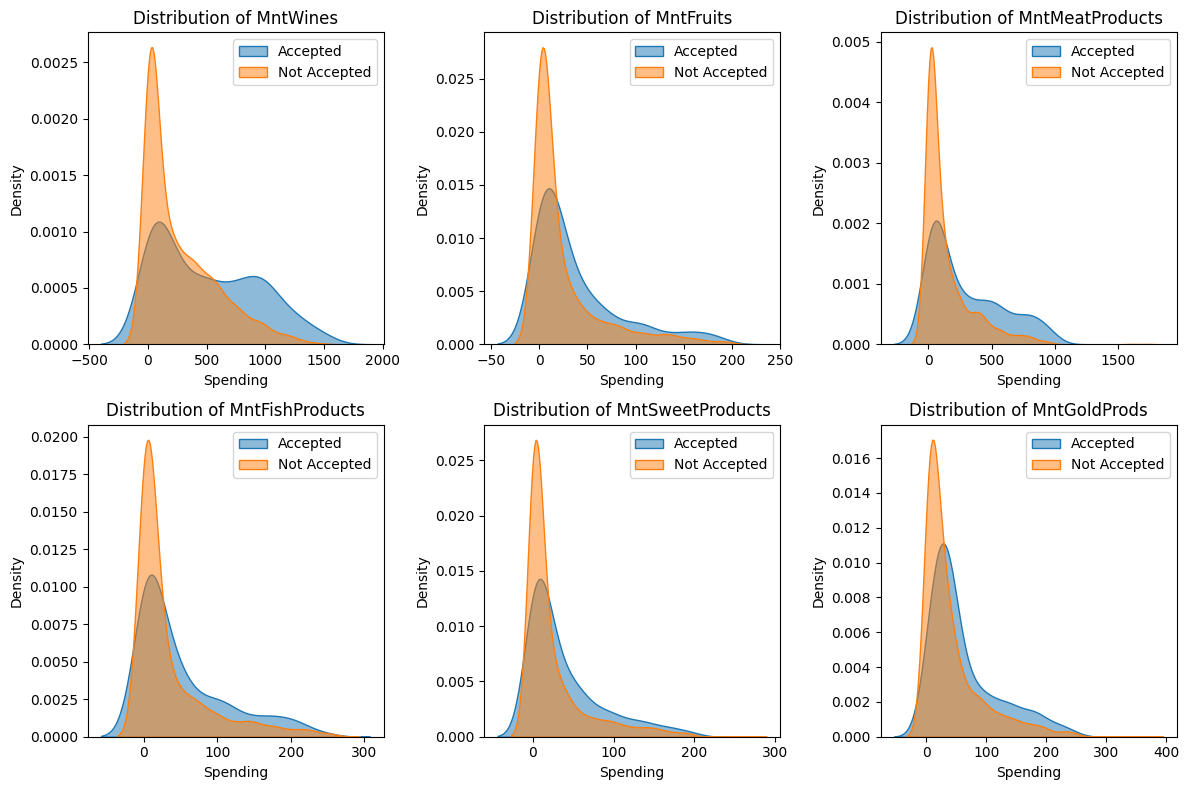

In [107]:
spendingcl = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for column in spendingcl:
    stat, p_value = stats.ttest_ind(data[data['Response'] == 1][column], data[data['Response'] == 0][column])
    print(f'Independent Samples T-test for {column}: Statistic={stat}, p-value={p_value}')
    if p_value < 0.05:
        print(f'**Result:** Reject the null hypothesis (significant difference in spending behavior for {column}).')
        print('------------------------------------------------------------------------------------')

    else:
        print(f'**Result:** Fail to reject the null hypothesis (no significant difference in spending behavior for {column}).')
        
plt.figure(figsize=(12, 8))
for i, column in enumerate(spendingcl, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data[data['Response'] == 1][column], label='Accepted', fill=True, alpha=0.5)
    sns.kdeplot(data[data['Response'] == 0][column], label='Not Accepted', fill=True, alpha=0.5)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Spending')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

###  3. Do customers with children spend differently than those without children?

Mann-Whitney U test for MntWines: Statistic=293975.5, p-value=4.492850999351284e-54
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntWines).
Mann-Whitney U test for MntFruits: Statistic=221158.0, p-value=1.3673855339550388e-96
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntFruits).
Mann-Whitney U test for MntMeatProducts: Statistic=189243.5, p-value=3.517496911419581e-118
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntMeatProducts).
Mann-Whitney U test for MntFishProducts: Statistic=201201.0, p-value=3.258640926205047e-110
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntFishProducts).
Mann-Whitney U test for MntSweetProducts: Statistic=228886.5, p-value=1.330567019863692e-91
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntSweetProducts).
Mann-Whitney U test for MntGoldProds

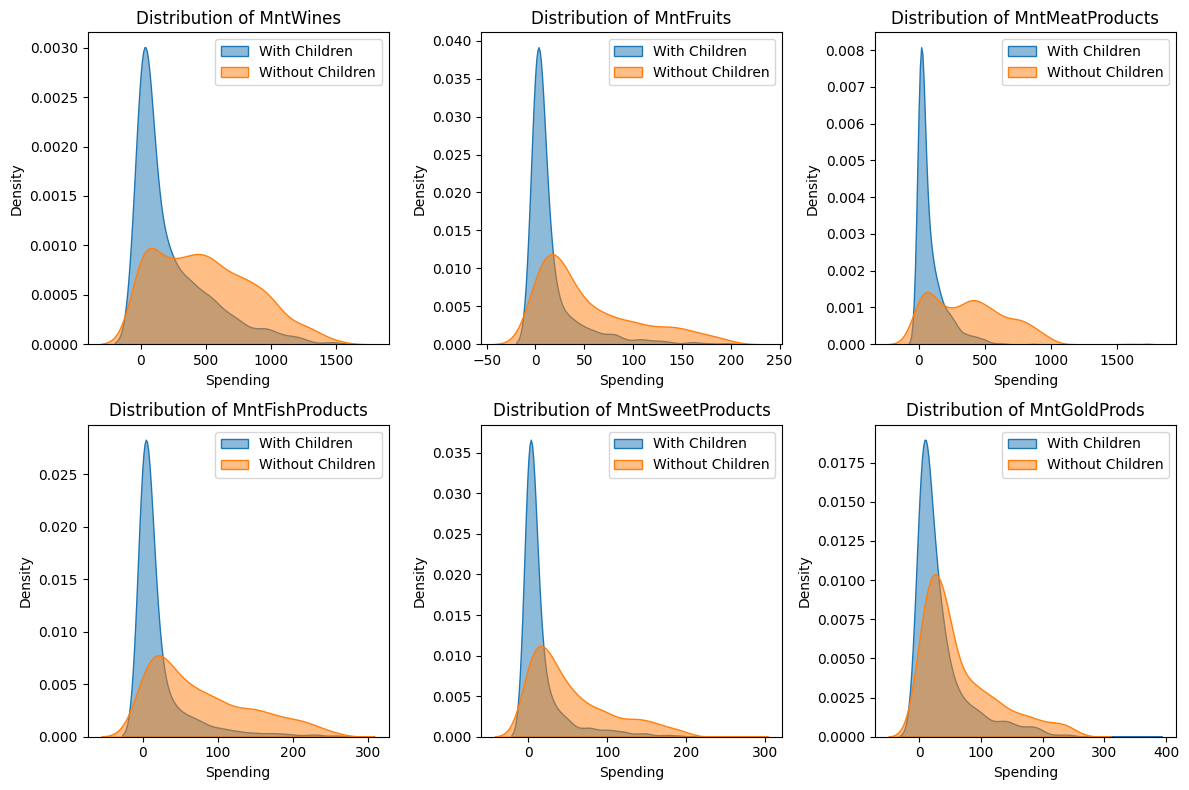

In [108]:
data['Has_Children'] = ((data['Kidhome'] > 0) | (data['Teenhome'] > 0)).astype(int)

for column in spendingcl:
    stat, p_value = stats.mannwhitneyu(data[data['Has_Children'] == 1][column], data[data['Has_Children'] == 0][column])
    print(f'Mann-Whitney U test for {column}: Statistic={stat}, p-value={p_value}')
    if p_value < 0.05:
        print(f'**Result:** Reject the null hypothesis (significant difference in spending behavior for {column}).')
    else:
        print(f'**Result:** Fail to reject the null hypothesis (no significant difference in spending behavior for {column}).')

print('------------------------------------------------------------------------------------')

plt.figure(figsize=(12, 8))
for i, column in enumerate(spendingcl, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data[data['Has_Children'] == 1][column], label='With Children', fill=True, alpha=0.5)
    sns.kdeplot(data[data['Has_Children'] == 0][column], label='Without Children', fill=True, alpha=0.5)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Spending')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

In [109]:
data['Has_Children'].value_counts()

Has_Children
1    1598
0     634
Name: count, dtype: int64

In [110]:
print(data['Has_Children'].value_counts(normalize=True) * 100)

Has_Children
1    71.594982
0    28.405018
Name: proportion, dtype: float64


### Extra Test 2: Do customers with children accept campaigns as much as those without children?

In [111]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age_Category',
       'Has_Children'],
      dtype='object')

                  Accepted  Not Accepted
With Children           11           933
Without Children       133          1155
Chi-Squared Test Statistic: 74.23562028194439, p-value: 6.9327988036182695e-18
There is a significant difference in campaign acceptance between customers with children and customers without children.


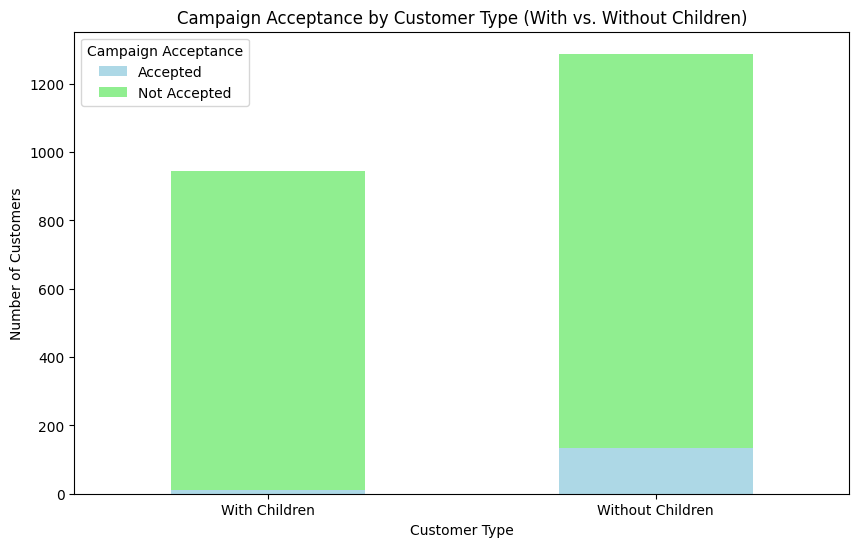

In [112]:
camp = pd.DataFrame({
    'Accepted': [
        data[data['Kidhome'] > 0]['AcceptedCmp1'].sum(),
        data[data['Kidhome'] == 0]['AcceptedCmp1'].sum()
    ],
    'Not Accepted': [
        data[data['Kidhome'] > 0]['AcceptedCmp1'].count() - data[data['Kidhome'] > 0]['AcceptedCmp1'].sum(),
        data[data['Kidhome'] == 0]['AcceptedCmp1'].count() - data[data['Kidhome'] == 0]['AcceptedCmp1'].sum()
    ]
})

camp.index = ['With Children', 'Without Children']
print(camp)


chi2, p, dof, expected = chi2_contingency(camp)


print(f'Chi-Squared Test Statistic: {chi2}, p-value: {p}')


alpha = 0.05
if p < alpha:
    print("There is a significant difference in campaign acceptance between customers with children and customers without children.")
else:
    print("There is no significant difference in campaign acceptance between customers with children and customers without children.")


camp.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'], figsize=(10, 6))
plt.title('Campaign Acceptance by Customer Type (With vs. Without Children)')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign Acceptance', labels=['Accepted', 'Not Accepted'])
plt.xticks(rotation=0)
plt.show()

### Extra Test 3: Do customers with kid accept campaigns as much as those with teen?

            Accepted  Not Accepted
With Kids         11           933
With Teens        29          1051
Chi-Squared Test Statistic: 5.247955351854383, p-value: 0.02197257519698824
There is a significant difference in campaign acceptance between customers with children and customers with teenagers.


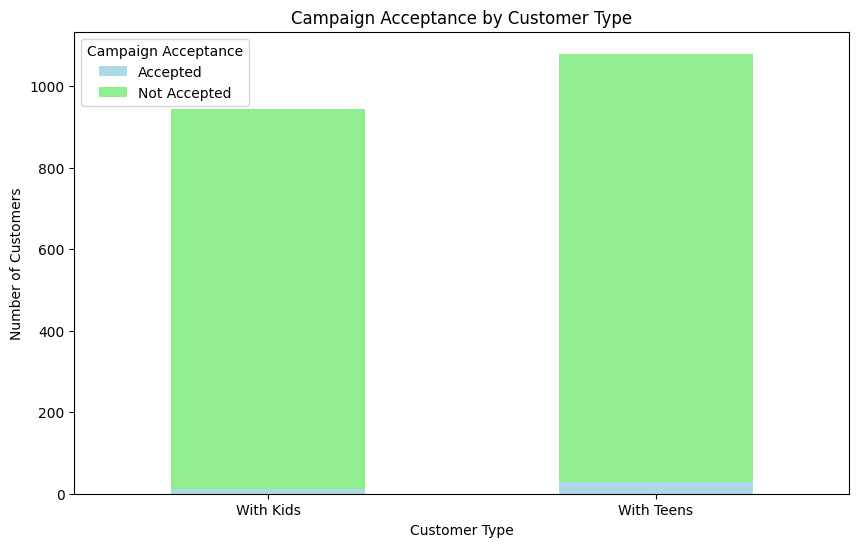

In [113]:
camp = pd.DataFrame({
    'Accepted': [data[data['Kidhome'] > 0]['AcceptedCmp1'].sum(), 
                 data[data['Teenhome'] > 0]['AcceptedCmp1'].sum()],
    'Not Accepted': [data[data['Kidhome'] > 0]['AcceptedCmp1'].count() - data[data['Kidhome'] > 0]['AcceptedCmp1'].sum(),
                    data[data['Teenhome'] > 0]['AcceptedCmp1'].count() - data[data['Teenhome'] > 0]['AcceptedCmp1'].sum()]
})

camp.index = ['With Kids', 'With Teens']
print(camp)


chi2, p, dof, expected = chi2_contingency(camp)

print(f'Chi-Squared Test Statistic: {chi2}, p-value: {p}')


alpha = 0.05
if p < alpha:
    print("There is a significant difference in campaign acceptance between customers with children and customers with teenagers.")
else:
    print("There is no significant difference in campaign acceptance between customers with children and customers with teenagers.")

camp.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'], figsize=(10, 6))
plt.title('Campaign Acceptance by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.legend(title='Campaign Acceptance', labels=['Accepted', 'Not Accepted'])
plt.xticks(rotation=0)
plt.show()

In [114]:
print(data['Has_Children'].value_counts(normalize=True) * 100)

Has_Children
1    71.594982
0    28.405018
Name: proportion, dtype: float64


In [115]:
print(data['Kidhome'].value_counts(normalize=True) * 100)

Kidhome
0    57.706093
1    40.143369
2     2.150538
Name: proportion, dtype: float64


In [116]:
print(data['Teenhome'].value_counts(normalize=True) * 100)

Teenhome
0    51.612903
1    46.057348
2     2.329749
Name: proportion, dtype: float64


### 4. Is there a significant difference in spending on different product categories?

In [117]:
statistic, p_value = stats.friedmanchisquare(*data[spendingcl].values.T )

print(f'Friedman Test: Statistic={statistic}, p-value={p_value}')
alpha = 0.05
if p_value < alpha:
    print('**Result:** Reject the null hypothesis (significant difference in spending across product categories).')
else:
    print('**Result:** Fail to reject the null hypothesis (no significant difference in spending across product categories).')

Friedman Test: Statistic=5949.414629024426, p-value=0.0
**Result:** Reject the null hypothesis (significant difference in spending across product categories).


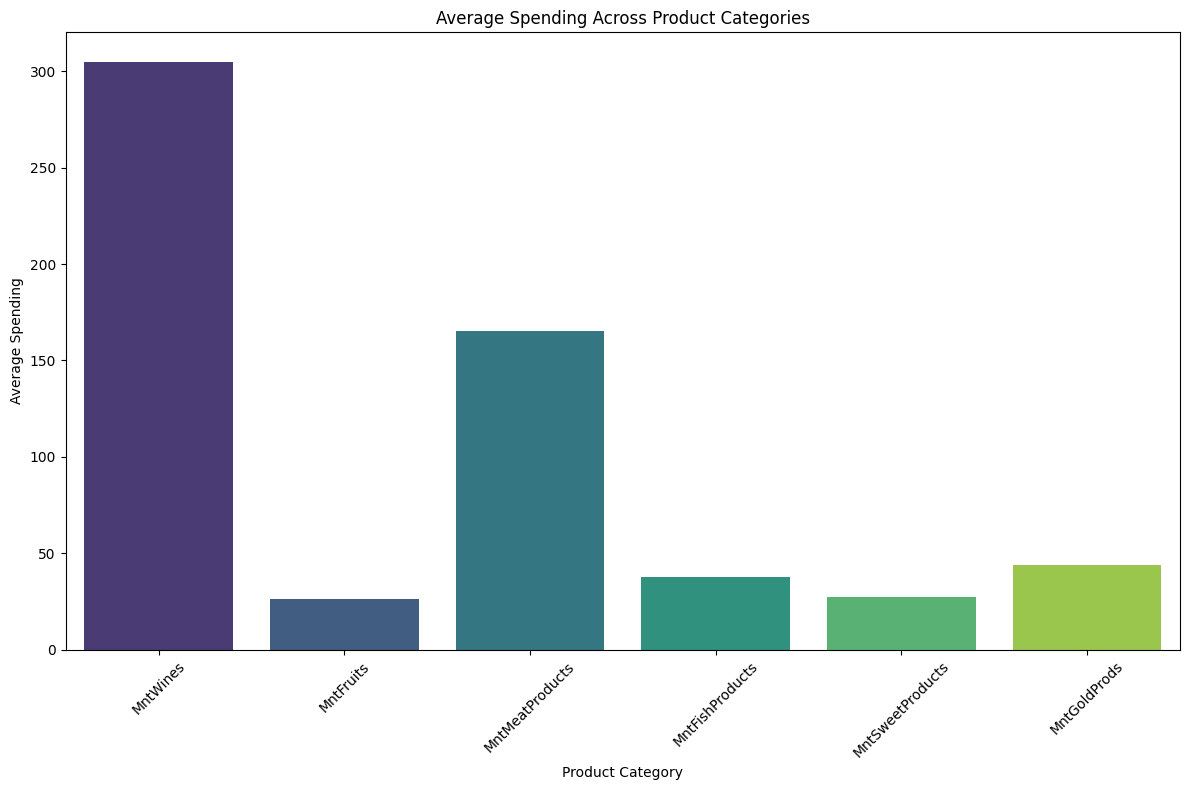

In [119]:
meanSpending = data[spendingcl].mean().reset_index()
meanSpending.columns = ['Product_Category', 'Average_Spending']

plt.figure(figsize=(12, 8))
sns.barplot(x='Product_Category', y='Average_Spending', data=meanSpending, palette='viridis')
plt.title('Average Spending Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 5. Is there a relationship between customer education level and acceptance of promotional campaigns?

In [120]:
contingencyTable = pd.crosstab(data['Education'], data['Response'], margins=False)


chi2_stat, p_value, dof, expected = chi2_contingency(contingencyTable)

print(f'Chi-Square Test: Statistic={chi2_stat}, p-value={p_value}, Degrees of Freedom={dof}')


alpha = 0.05
if p_value < alpha:
    print('**Result:** Reject the null hypothesis (there is a significant relationship between education level and acceptance of promotional campaigns).')
else:
    print('**Result:** Fail to reject the null hypothesis (no significant relationship between education level and acceptance of promotional campaigns).')

Chi-Square Test: Statistic=23.59125001808961, p-value=9.644654000505031e-05, Degrees of Freedom=4
**Result:** Reject the null hypothesis (there is a significant relationship between education level and acceptance of promotional campaigns).


,Education,Response,Count
0,0,Not Accepted,181
1,0,Accepted,22
2,1,Not Accepted,52
3,1,Accepted,2
4,2,Not Accepted,972
5,2,Accepted,152
6,3,Not Accepted,312
7,3,Accepted,57
8,4,Not Accepted,381
9,4,Accepted,101


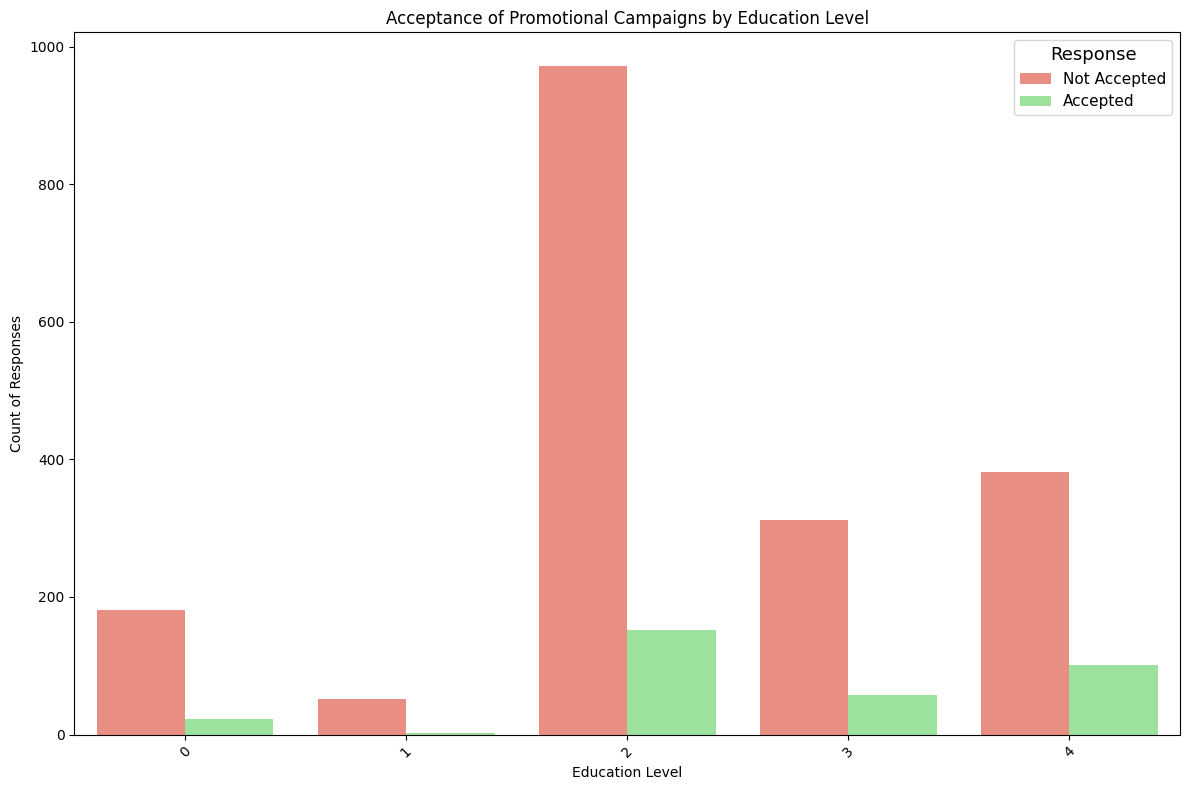

In [121]:
cnt = data.groupby(['Education', 'Response']).size().reset_index(name='Count')

cnt['Response'] = cnt['Response'].map({1: 'Accepted', 0: 'Not Accepted'})

display(cnt)

plt.figure(figsize=(12, 8))
sns.barplot(x='Education', y='Count', hue='Response', data=cnt, 
                palette={'Accepted': 'lightgreen', 'Not Accepted': 'salmon'}, hue_order=['Not Accepted', 'Accepted'])
    
plt.title('Acceptance of Promotional Campaigns by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45)

plt.legend(title='Response', title_fontsize='13', loc='upper right', fontsize='11')

plt.tight_layout()
plt.show()

**Mapping for Education:**
* 0: 2n Cycle
* 1: Basic
* 2: Graduation
* 3: Master
* 4: PhD

In [122]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age_Category',
       'Has_Children'],
      dtype='object')

### Extra Test 4: Is there a relationship between customer age category level and acceptance of promotional campaigns?

In [123]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age_Category',
       'Has_Children'],
      dtype='object')

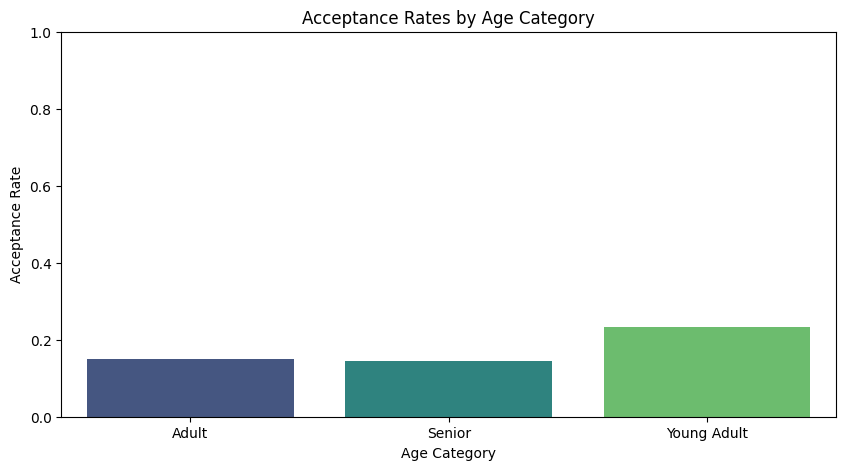

Chi-square Statistic: 2.477157056565756, p-value: 0.289795861921058
Accept the null hypothesis: There is no significant association between Age Category and Response.


In [134]:
acceptRT = data.groupby('Age_Category')['Response'].mean().reset_index()
acceptRT['Age_Category'] = acceptRT['Age_Category'].map({0: 'Adult', 1: 'Senior', 2: 'Young Adult'})

plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Category', y='Response', data=acceptRT, palette='viridis')
plt.title('Acceptance Rates by Age Category')
plt.ylabel('Acceptance Rate')
plt.xlabel('Age Category')
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1 for better visualization
plt.show()

contingencyTable = pd.crosstab(data['Age_Category'], data['Response'])
chi2, p, dof, expected = chi2_contingency(contingencyTable)

print(f"Chi-square Statistic: {chi2}, p-value: {p}")

alpha = 0.05 
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Age Category and Response.")
else:
    print("Accept the null hypothesis: There is no significant association between Age Category and Response.")

### Extra Test 5: Is there a relationship between Marital status and acceptance of promotional campaigns?

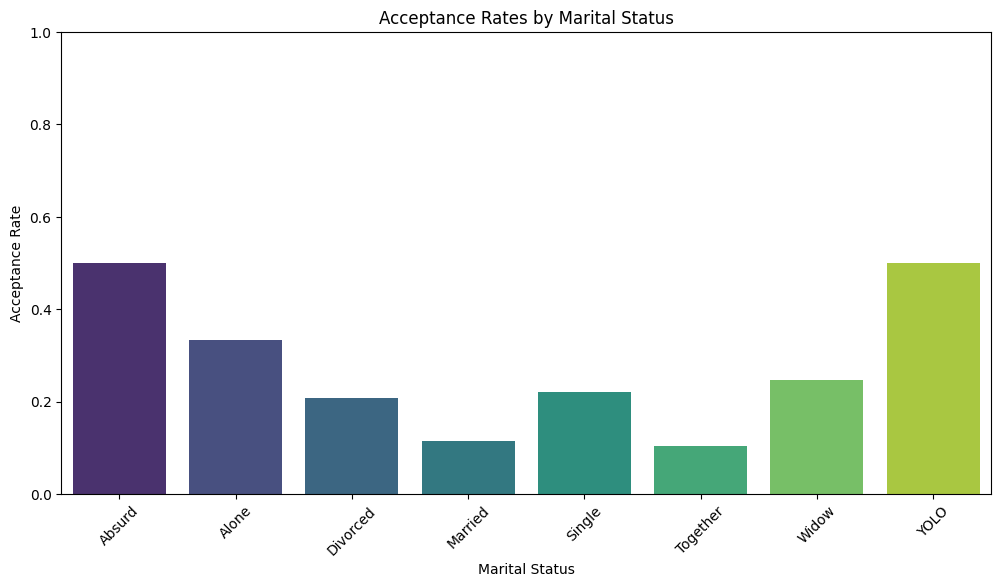

Chi-square Statistic: 53.66007160250334, p-value: 2.7455801886417216e-09
Reject the null hypothesis: There is a significant association between Marital Status and Response.


In [126]:
acceptRT = data.groupby('Marital_Status')['Response'].mean().reset_index()

marital_mapping = {
    0: 'Absurd',
    1: 'Alone',
    2: 'Divorced',
    3: 'Married',
    4: 'Single',
    5: 'Together',
    6: 'Widow',
    7: 'YOLO'
}
acceptRT['Marital_Status'] = acceptRT['Marital_Status'].map(marital_mapping)


plt.figure(figsize=(12, 6))
sns.barplot(x='Marital_Status', y='Response', data=acceptRT, palette='viridis')
plt.title('Acceptance Rates by Marital Status')
plt.ylabel('Acceptance Rate')
plt.xlabel('Marital Status')
plt.ylim(0, 1) 
plt.xticks(rotation=45) 
plt.show()

contingencyTable = pd.crosstab(data['Marital_Status'], data['Response'])
chi2, p, dof, expected = chi2_contingency(contingencyTable)


print(f"Chi-square Statistic: {chi2}, p-value: {p}")


alpha = 0.05 
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Marital Status and Response.")
else:
    print("Accept the null hypothesis: There is no significant association between Marital Status and Response.")

### As a hobby (no mention in report only as a hobby)

### Do customers who accepted the offer spend differently than those who not?

In [127]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age_Category',
       'Has_Children'],
      dtype='object')

Independent Samples T-test for MntWines: Statistic=12.005794655842754, p-value=3.1892857005214924e-32
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntWines).
------------------------------------------------------------------------------------
Independent Samples T-test for MntFruits: Statistic=5.929103211518411, p-value=3.520643389177366e-09
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntFruits).
------------------------------------------------------------------------------------
Independent Samples T-test for MntMeatProducts: Statistic=12.024905909933404, p-value=2.5667951255241724e-32
**Result:** Reject the null hypothesis (significant difference in spending behavior for MntMeatProducts).
------------------------------------------------------------------------------------
Independent Samples T-test for MntFishProducts: Statistic=5.251567050821659, p-value=1.6511732038808093e-07
**Result:** Reject t

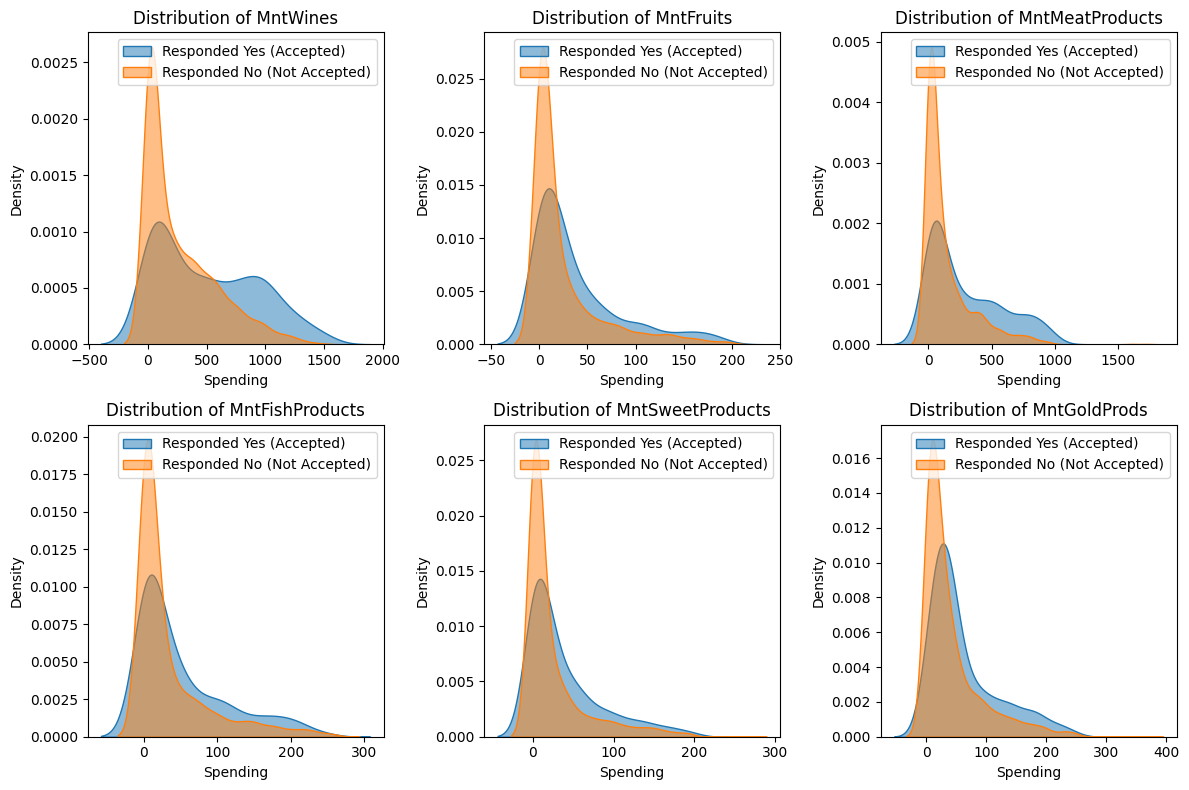

In [128]:
spendingcl = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for column in spendingcl:

    stat, p_value = stats.ttest_ind(data[data['Response'] == 1][column], data[data['Response'] == 0][column])
    print(f'Independent Samples T-test for {column}: Statistic={stat}, p-value={p_value}')
    

    if p_value < 0.05:
        print(f'**Result:** Reject the null hypothesis (significant difference in spending behavior for {column}).')
    else:
        print(f'**Result:** Fail to reject the null hypothesis (no significant difference in spending behavior for {column}).')
    
    print('------------------------------------------------------------------------------------')


plt.figure(figsize=(12, 8))
for i, column in enumerate(spendingcl, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data[data['Response'] == 1][column], label='Responded Yes (Accepted)', fill=True, alpha=0.5)
    sns.kdeplot(data[data['Response'] == 0][column], label='Responded No (Not Accepted)', fill=True, alpha=0.5)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Spending')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

 ### Do customers from different maritual status have different income levels?

In [129]:
groups = data.groupby('Marital_Status')['Income'].apply(list)

statistic, p_value = kruskal(*groups)

print(f"Kruskal-Wallis H test statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between the income levels of different education backgrounds.")
else:
    print("Fail to reject the null hypothesis: No significant differences between income levels.")

Kruskal-Wallis H test statistic: 8.702127259818282
P-value: 0.2747553662591781
Fail to reject the null hypothesis: No significant differences between income levels.


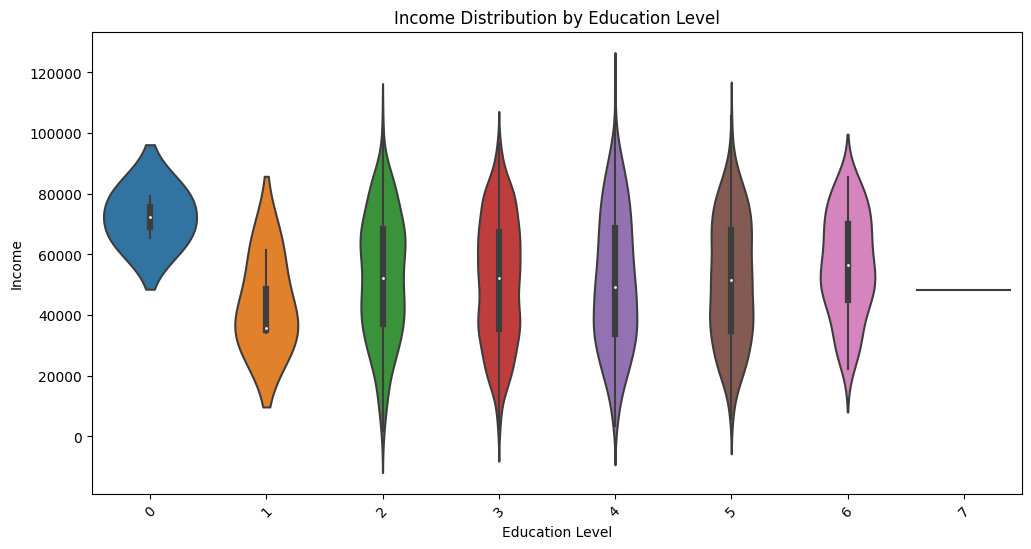

In [130]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Marital_Status', y='Income', data=data)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

In [131]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age_Category',
       'Has_Children'],
      dtype='object')

In [132]:
contingencyTable = pd.crosstab(data['Kidhome'], data['Response'], margins=False)

chi2_stat, p_value, dof, expected = chi2_contingency(contingencyTable)

print(f'Chi-Square Test: Statistic={chi2_stat}, p-value={p_value}, Degrees of Freedom={dof}')


alpha = 0.05
if p_value < alpha:
    print('**Result:** Reject the null hypothesis (there is a significant relationship between education level and acceptance of promotional campaigns).')
else:
    print('**Result:** Fail to reject the null hypothesis (no significant relationship between education level and acceptance of promotional campaigns).')

Chi-Square Test: Statistic=14.707277830570858, p-value=0.0006402582705463123, Degrees of Freedom=2
**Result:** Reject the null hypothesis (there is a significant relationship between education level and acceptance of promotional campaigns).


,Kidhome,Response,Count
0,0,Not Accepted,1066
1,0,Accepted,222
2,1,Not Accepted,786
3,1,Accepted,110
4,2,Not Accepted,46
5,2,Accepted,2


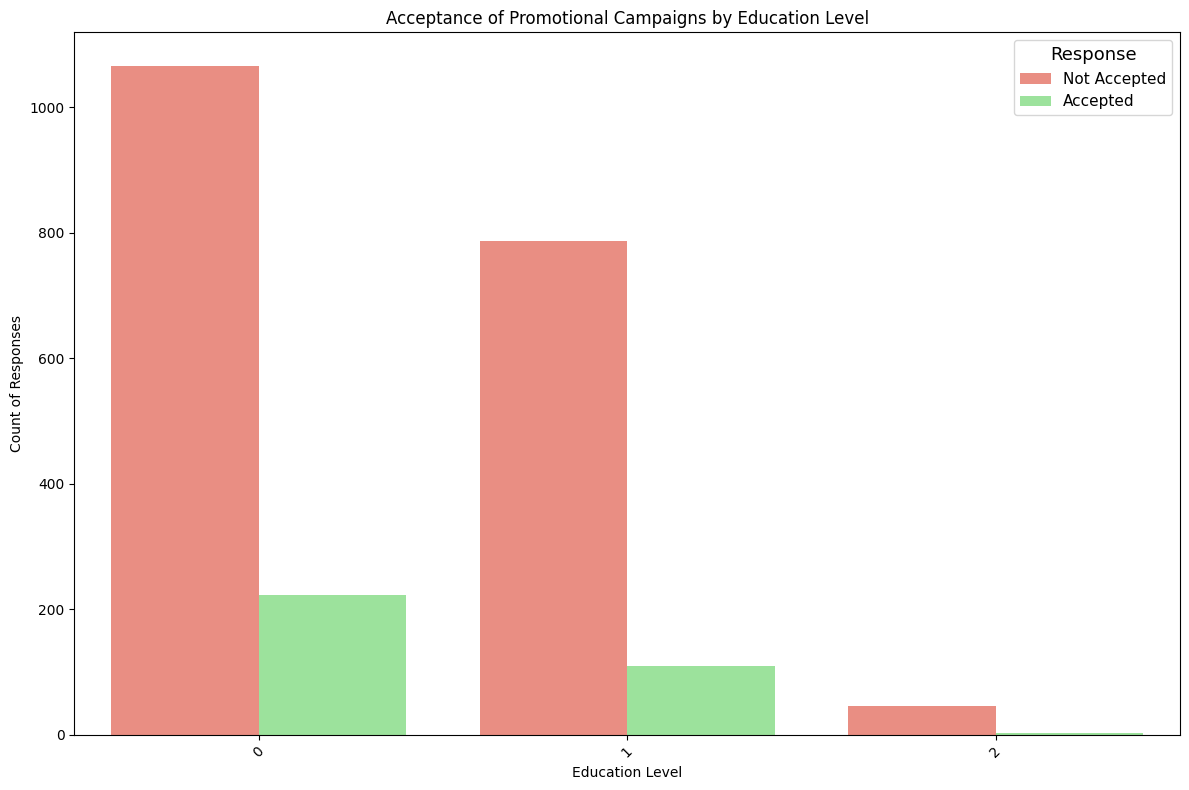

In [133]:
cnt = data.groupby(['Kidhome', 'Response']).size().reset_index(name='Count')

cnt['Response'] = cnt['Response'].map({1: 'Accepted', 0: 'Not Accepted'})

display(cnt)

plt.figure(figsize=(12, 8))
sns.barplot(x='Kidhome', y='Count', hue='Response', data=cnt, 
                palette={'Accepted': 'lightgreen', 'Not Accepted': 'salmon'}, hue_order=['Not Accepted', 'Accepted'])
    
plt.title('Acceptance of Promotional Campaigns by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45)

plt.legend(title='Response', title_fontsize='13', loc='upper right', fontsize='11')

plt.tight_layout()
plt.show()